YOUTUBE COMMENT SPAM DETECTION

Karthik M Jain 

In [1]:
#Import basic libraries

import numpy as np
import pandas as pd
import string
import nltk                          #Natural Language Toolkit
import matplotlib.pyplot as plt

In [2]:
#Concatenate datasets
df=pd.concat([pd.read_csv("images\\Youtube01-Psy.csv"),
             pd.read_csv("images\\Youtube02-KatyPerry.csv"),
             pd.read_csv("images\\Youtube03-LMFAO.csv"),
             pd.read_csv("images\\Youtube04-Eminem.csv"),
             pd.read_csv("images\\Youtube05-Shakira.csv")])

In [3]:
print("Total rows : ", len(df))

Total rows :  1956


In [4]:
#Print few contents
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
df.dtypes

COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [6]:
#Count of spam and not spam comments
print("Count of non-spam comments : ",len(df.query('CLASS==1')))
print("Count of spam comments : ",len(df.query('CLASS==0')))

Count of non-spam comments :  1005
Count of spam comments :  951


In [7]:
#Preprocessing task

#1. Lowercase every word
print("\nBefore lowercase every word :", df.loc[df["AUTHOR"]=="Julius NM"]["CONTENT"])         

df["CONTENT"]=df['CONTENT'].str.lower()                                   #Using str.lower()

rslt_df=df.loc[df["AUTHOR"]=="Julius NM"]
print("\nAfterwards :", df.loc[df["AUTHOR"]=="Julius NM"]["CONTENT"])

#2. Drop punctuation
#Reference site : https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas

print("\nBefore drop punctuation :", df.loc[df["AUTHOR"]=="Julius NM"]["CONTENT"])

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df["CONTENT"] = df['CONTENT'].apply(remove_punctuations)

print("\nAfterwards :", df.loc[df["AUTHOR"]=="Julius NM"]["CONTENT"])

#3. Drop very common words(stop words)(useless words)          
#Reference site : https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

print("\nBefore drop stop words :", df.loc[df["AUTHOR"]=="Julius NM"]["CONTENT"])
from nltk.corpus import stopwords
stop = stopwords.words('english')

df["CONTENT"] = df["CONTENT"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print("\nAfterwards :", df.loc[df["AUTHOR"]=="Julius NM"]["CONTENT"])


Before lowercase every word : 0    Huh, anyway check out this you[tube] channel: ...
Name: CONTENT, dtype: object

Afterwards : 0    huh, anyway check out this you[tube] channel: ...
Name: CONTENT, dtype: object

Before drop punctuation : 0    huh, anyway check out this you[tube] channel: ...
Name: CONTENT, dtype: object

Afterwards : 0    huh anyway check out this youtube channel koby...
Name: CONTENT, dtype: object

Before drop stop words : 0    huh anyway check out this youtube channel koby...
Name: CONTENT, dtype: object

Afterwards : 0    huh anyway check youtube channel kobyoshi02
Name: CONTENT, dtype: object


In [8]:
#Categorize independent column and dependent column

x=df.iloc[:,-2].values
y=df.iloc[:,-1].values

In [9]:
#x variable has only CONTENT Column data
x

array(['huh anyway check youtube channel kobyoshi02',
       'hey guys check new channel first vid us monkeys im monkey white shirtplease leave like comment please subscribe',
       'test say murdevcom', ..., 'wow', 'shakira u wiredo',
       'shakira best dancer'], dtype=object)

In [10]:
#x variable has Class Label
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [11]:
#Building training and testing data
#Training data=70%  Testing data=30%

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
#CountVectorizer

#https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
cvec=vectorizer.fit_transform(X_train)
cvec

<1369x3215 sparse matrix of type '<class 'numpy.int64'>'
	with 10441 stored elements in Compressed Sparse Row format>

In [13]:
#CountVectorized Dataframe
print(pd.DataFrame(cvec.toarray(),columns=vectorizer.get_feature_names()).head(3))

   002  0058  04  10  100  1000  1000000  1000000000  100100  1015  ...  \
0    0     0   0   0    0     0        0           0       0     0  ...   
1    0     0   0   0    0     0        0           0       0     0  ...   
2    0     0   0   0    0     0        0           0       0     0  ...   

   zombie  zonepacom  οh  لل  강남스타일  ｃｏｍｍｅｎｔ  ｄａｍｎ  ｆａｎｃy  ｉｓ  ｔｈｉｓ  
0       0          0   0   0      0        0     0      0   0     0  
1       0          0   0   0      0        0     0      0   0     0  
2       0          0   0   0      0        0     0      0   0     0  

[3 rows x 3215 columns]


In [14]:
#Import TfidfVectorizer 

from sklearn.feature_extraction.text import TfidfVectorizer

tvec=TfidfVectorizer()
X=tvec.fit_transform(X_train)

print(pd.DataFrame(X.toarray(),columns=tvec.get_feature_names()).head(3))

   002  0058   04   10  100  1000  1000000  1000000000  100100  1015  ...  \
0  0.0   0.0  0.0  0.0  0.0   0.0      0.0         0.0     0.0   0.0  ...   
1  0.0   0.0  0.0  0.0  0.0   0.0      0.0         0.0     0.0   0.0  ...   
2  0.0   0.0  0.0  0.0  0.0   0.0      0.0         0.0     0.0   0.0  ...   

   zombie  zonepacom   οh   لل  강남스타일  ｃｏｍｍｅｎｔ  ｄａｍｎ  ｆａｎｃy   ｉｓ  ｔｈｉｓ  
0     0.0        0.0  0.0  0.0    0.0      0.0   0.0    0.0  0.0   0.0  
1     0.0        0.0  0.0  0.0    0.0      0.0   0.0    0.0  0.0   0.0  
2     0.0        0.0  0.0  0.0    0.0      0.0   0.0    0.0  0.0   0.0  

[3 rows x 3215 columns]


Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

#Hence only implementation of MultinomialNB and BernoullNB is shown

In [15]:
#Array Initialization
models=[]                        #Model names
results_count=[]                 #Accuracy of models for CountVectorizer
results_tfidf=[]                 #Accuracy of models for TfidfVectorizer
estimators=[]                    #Array for Bagging 
count_acc=[]
count_pre=[]
count_rec=[]
tfidf_acc=[]
tfidf_pre=[]
tfidf_rec=[]

In [16]:
#CountVectorizer and MultinomialNB

from sklearn.pipeline import make_pipeline                                 #Import Pipeline
from sklearn.naive_bayes import  MultinomialNB                             #Import MultinomialNB
from sklearn.metrics import confusion_matrix                               #Import library for Confusion matrix

#Create Pipeline
model=make_pipeline(CountVectorizer(),MultinomialNB())
models.append('MNB')
estimators.append(('MNB',model))

model.fit(X_train,Y_train)                                                 #Fit the model

y_pred=model.predict(X_test)                                               #Predict Class label using the model for X_test data

print("Confusion Matrix of CountVectorizer and MultinomialNB :\n",confusion_matrix(Y_test,y_pred))

from sklearn import metrics                                                #Calculate accuracy,precision and recall
score=metrics.accuracy_score(Y_test,y_pred)
count_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
count_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
count_rec.append(recall)
results_count.append(score)

print("\nAccuracy Score of CountVectorizer and MultinomialNB :  : ",score)
print("\nClassification Report :\n", metrics.classification_report(Y_test,y_pred))

from sklearn.model_selection import cross_val_score                        #Use cross validation
scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())

Confusion Matrix of CountVectorizer and MultinomialNB :
 [[236  44]
 [ 25 282]]

Accuracy Score of CountVectorizer and MultinomialNB :  :  0.8824531516183987

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       280
           1       0.87      0.92      0.89       307

    accuracy                           0.88       587
   macro avg       0.88      0.88      0.88       587
weighted avg       0.88      0.88      0.88       587


Cross Value Scores :  [0.80102041 0.87468031 0.88746803 0.85677749 0.85933504]

Accuracy :  0.8558562555456964


In [17]:
#TfidfVectorizer and MultinomialNB

model=make_pipeline(TfidfVectorizer(),MultinomialNB())

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
tfidf_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
tfidf_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
tfidf_rec.append(recall)
results_tfidf.append(score)

print("\nConfusion Matrix of TfidfVectorizer and MultinomialNB :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy of TfidfVectorizer and MultinomialNB : ",score)
print("\nClassification Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())


Confusion Matrix of TfidfVectorizer and MultinomialNB :
 [[239  41]
 [ 32 275]]

Accuracy of TfidfVectorizer and MultinomialNB :  0.8756388415672913

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       280
           1       0.87      0.90      0.88       307

    accuracy                           0.88       587
   macro avg       0.88      0.87      0.88       587
weighted avg       0.88      0.88      0.88       587


Cross Value Scores :  [0.7755102  0.86189258 0.89258312 0.85677749 0.85421995]

Accuracy :  0.8481966699723367


In [18]:
#CountVectorizer and BernoulliNB

from sklearn.naive_bayes import BernoulliNB

model=make_pipeline(CountVectorizer(),BernoulliNB())

model.fit(X_train,Y_train)
models.append('BNB')
estimators.append(("BNB",model))

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
count_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
count_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
count_rec.append(recall)
results_count.append(score)

print("\nConfusion Matrix of CountVectorizer and BernoulliNB :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy of CountVectorizer and BernoulliNB : ",score)
print("\nClassification Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())


Confusion Matrix of CountVectorizer and BernoulliNB :
 [[277   3]
 [ 87 220]]

Accuracy of CountVectorizer and BernoulliNB :  0.8466780238500852

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       280
           1       0.99      0.72      0.83       307

    accuracy                           0.85       587
   macro avg       0.87      0.85      0.85       587
weighted avg       0.88      0.85      0.84       587


Cross Value Scores :  [0.74489796 0.76214834 0.69820972 0.91560102 0.90792839]

Accuracy :  0.8057570854428728


In [19]:
#TfidfVectorizer and BernoulliNB

model=make_pipeline(TfidfVectorizer(),BernoulliNB())

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
tfidf_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
tfidf_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
tfidf_rec.append(recall)
results_tfidf.append(score)

print("\nConfusion Matrix of TfidfVectorizer and BernoulliNB :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy of TfidfVectorizer and BernoulliNB : ",score)
print("\nClassification Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())


Confusion Matrix of TfidfVectorizer and BernoulliNB :
 [[277   3]
 [ 87 220]]

Accuracy of TfidfVectorizer and BernoulliNB :  0.8466780238500852

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       280
           1       0.99      0.72      0.83       307

    accuracy                           0.85       587
   macro avg       0.87      0.85      0.85       587
weighted avg       0.88      0.85      0.84       587


Cross Value Scores :  [0.74489796 0.76214834 0.69820972 0.91560102 0.90792839]

Accuracy :  0.8057570854428728


While the tf–idf normalization is often very useful, there might be cases where the binary occurrence markers might
offer better features. This can be achieved by using the binary parameter of CountVectorizer.
In particular, some estimators such as Bernoulli Naive Bayes explicitly model discrete boolean random variables. 
Also, very short texts are likely to have noisy tf–idf values while the binary occurrence info is more stable.

In [20]:
#CountVectorizer and DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

regressor=DecisionTreeClassifier(criterion="entropy",max_depth=None,splitter='best')

model=make_pipeline(CountVectorizer(),regressor)
models.append('DTree')

estimators.append(('DTree',model))

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
count_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
count_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
count_rec.append(recall)
results_count.append(score)

print("\nConfusion Matrix of CountVectorizer and DecisionTree :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy of CountVectorizer and DecisionTree : ",score)
print("\nClassification Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())


Confusion Matrix of CountVectorizer and DecisionTree :
 [[270  10]
 [ 52 255]]

Accuracy of CountVectorizer and DecisionTree :  0.8943781942078365

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       280
           1       0.96      0.83      0.89       307

    accuracy                           0.89       587
   macro avg       0.90      0.90      0.89       587
weighted avg       0.90      0.89      0.89       587


Cross Value Scores :  [0.74489796 0.82352941 0.94629156 0.95396419 0.92071611]

Accuracy :  0.8778798475912104


In [21]:
#TfidfVectorizer and DecisionTreeClassifier

model=make_pipeline(TfidfVectorizer(),regressor)

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
tfidf_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
tfidf_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
tfidf_rec.append(recall)
results_tfidf.append(score)

print("Confusion Matrix of TfidfVectorizer and DecisionTree :\n",confusion_matrix(Y_test,y_pred))
print("Accuracy of TfidfVectorizer and DecisionTree : ",score)
print("\nClassification Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("Cross Value Scores : ",scores)
print("Accuracy : ",scores.mean())

Confusion Matrix of TfidfVectorizer and DecisionTree :
 [[264  16]
 [ 52 255]]
Accuracy of TfidfVectorizer and DecisionTree :  0.8841567291311755

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       280
           1       0.94      0.83      0.88       307

    accuracy                           0.88       587
   macro avg       0.89      0.89      0.88       587
weighted avg       0.89      0.88      0.88       587

Cross Value Scores :  [0.74234694 0.81074169 0.94117647 0.9488491  0.91815857]
Accuracy :  0.8722545539955112


A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [22]:
#CountVectorizer and Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model=make_pipeline(CountVectorizer(),RandomForestClassifier())
models.append("RFC")

estimators.append(("RFC",model))

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
count_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
count_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
count_rec.append(recall)
results_count.append(score)

print("\nConfusion Matrix of CountVectorizer and RandomForestClassifier :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy of CountVectorizer and RandomForestClassifier : ",score)
print("\nClassification Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())


Confusion Matrix of CountVectorizer and RandomForestClassifier :
 [[273   7]
 [ 52 255]]

Accuracy of CountVectorizer and RandomForestClassifier :  0.899488926746167

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       280
           1       0.97      0.83      0.90       307

    accuracy                           0.90       587
   macro avg       0.91      0.90      0.90       587
weighted avg       0.91      0.90      0.90       587


Cross Value Scores :  [0.79591837 0.82352941 0.94373402 0.96930946 0.92071611]

Accuracy :  0.8906414739808968


In [23]:
#TfidfVectorizer and Random Forest Classifier

model=make_pipeline(TfidfVectorizer(),RandomForestClassifier())

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
tfidf_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
tfidf_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
tfidf_rec.append(recall)
results_tfidf.append(score)

print("\nConfusion Matrix of TfidfVectorizer and RandomForestClassifier :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy of TfidfVectorizer and RandomForestClassifier : ",score)
print("\nClassification Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())


Confusion Matrix of TfidfVectorizer and RandomForestClassifier :
 [[270  10]
 [ 54 253]]

Accuracy of TfidfVectorizer and RandomForestClassifier :  0.8909710391822828

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       280
           1       0.96      0.82      0.89       307

    accuracy                           0.89       587
   macro avg       0.90      0.89      0.89       587
weighted avg       0.90      0.89      0.89       587


Cross Value Scores :  [0.79336735 0.82097187 0.94117647 0.96930946 0.91304348]

Accuracy :  0.8875737251422308


In [24]:
#CountVectorizer and KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

model=make_pipeline(CountVectorizer(),KNeighborsClassifier(n_neighbors=5))
models.append("KNN")
estimators.append(("KNN",model))

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
count_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
count_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
count_rec.append(recall)
results_count.append(score)

print("\nConfusion Matrix of CountVectorizer and KNeighborsClassifier :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy of CountVectorizer and KNeighborsClassifier : ",score)
print("\nClassificatio Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())


Confusion Matrix of CountVectorizer and KNeighborsClassifier :
 [[275   5]
 [114 193]]

Accuracy of CountVectorizer and KNeighborsClassifier :  0.797274275979557

Classificatio Report :
               precision    recall  f1-score   support

           0       0.71      0.98      0.82       280
           1       0.97      0.63      0.76       307

    accuracy                           0.80       587
   macro avg       0.84      0.81      0.79       587
weighted avg       0.85      0.80      0.79       587


Cross Value Scores :  [0.67346939 0.69309463 0.87212276 0.86189258 0.79539642]

Accuracy :  0.779195156323399


In [25]:
#TfidfVectorizer and KNeighbors Classifier

model=make_pipeline(TfidfVectorizer(),KNeighborsClassifier())

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)
tfidf_acc.append(score)
precision=metrics.precision_score(Y_test,y_pred,average='weighted')
tfidf_pre.append(precision)
recall=metrics.recall_score(Y_test,y_pred,average='weighted')
tfidf_rec.append(recall)
results_tfidf.append(score)

print("\nConfusion Matrix of TfidfVectorizer and KNeighborsClassifier :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy of TfidfVectorizer and KNeighborsClassifier : ",score)
print("\nClassificatio Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(model,x,y,cv=5)

print("\nCross Value Scores : ",scores)
print("\nAccuracy : ",scores.mean())


Confusion Matrix of TfidfVectorizer and KNeighborsClassifier :
 [[279   1]
 [212  95]]

Accuracy of TfidfVectorizer and KNeighborsClassifier :  0.637137989778535

Classificatio Report :
               precision    recall  f1-score   support

           0       0.57      1.00      0.72       280
           1       0.99      0.31      0.47       307

    accuracy                           0.64       587
   macro avg       0.78      0.65      0.60       587
weighted avg       0.79      0.64      0.59       587


Cross Value Scores :  [0.55867347 0.59335038 0.77493606 0.60358056 0.56521739]

Accuracy :  0.6191515736729475


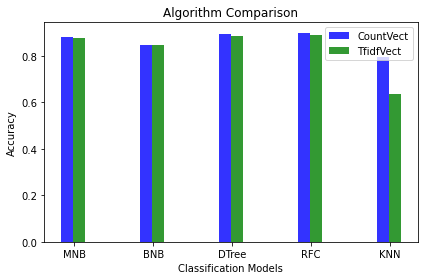

In [26]:
#Comparison Graph of Accuracy vs Classification Models along with CountVectorizer and TfidfVectorizer

fig, ax = plt.subplots()
y_pos=np.arange(len(models))                            #Calculate number of models

bar_width=0.15                                          #Width of bars
opacity=0.8

rects1=plt.bar(y_pos,results_count,bar_width,alpha=opacity,color='b',label='CountVect')      #Bar graph for CountVectorizer

rects2=plt.bar(y_pos+bar_width,results_tfidf,bar_width,alpha=opacity,color='g',label='TfidfVect')    #Bar graph of TfidfVectorizer

plt.xlabel('Classification Models')                     #Label X axis
plt.ylabel('Accuracy')                                  #Label Y axis
  
plt.title('Algorithm Comparison')
plt.xticks(0.09+y_pos,models)
plt.legend()

plt.tight_layout()
plt.show()

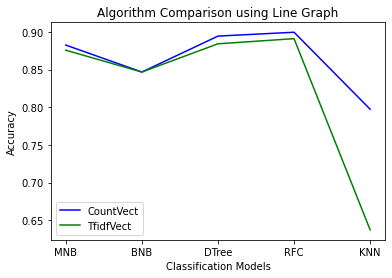

In [27]:
#LineGraph fot the same

plt.plot(models, results_count, color="blue",label='CountVect')                   #Line graph for CountVectorizer
plt.plot(models, results_tfidf, color='green',label='TfidfVect')                  #Line graph for TfidfVectorizer

plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison using Line Graph')
plt.legend()
plt.show()

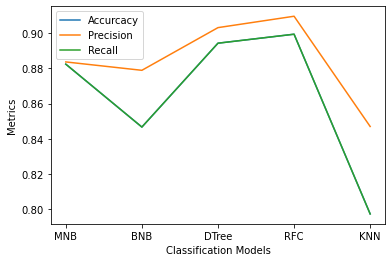

In [28]:
#Accuracy, Precision and Recall for CountVectorizer and Models

plt.plot(models,count_acc,label='Accurcacy')                        #LineGraph for Accuracy vs Models
plt.plot(models,count_pre,label='Precision')                        #LineGraph for Precision vs Models
plt.plot(models,count_rec,label='Recall')                           ##LineGraph for Recall vs Models
plt.xlabel('Classification Models')
plt.ylabel('Metrics')
plt.legend()
plt.show()

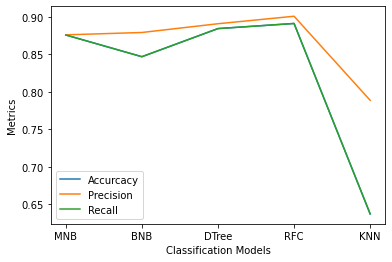

In [29]:
#Accuracy, Precision and Recall for TfidfVectorizer and Models

plt.plot(models,tfidf_acc,label='Accurcacy')
plt.plot(models,tfidf_pre,label='Precision')
plt.plot(models,tfidf_rec,label='Recall')
plt.xlabel('Classification Models')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [30]:
#KMeans Clustering

from sklearn.cluster import KMeans

#n_clusters is % because it has 5 varied datasets
kmeans=KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)

model=make_pipeline(TfidfVectorizer(),kmeans)

model.fit(X_train,Y_train)

#Display cluster centers
print("Cluster Centres : \n" ,kmeans.cluster_centers_)

#Display cluster labels
print("\nCluster Labels : ",kmeans.labels_)

Cluster Centres : 
 [[0.00058985 0.00048137 0.         ... 0.00052306 0.00052306 0.00052306]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00570661 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Cluster Labels :  [1 0 2 ... 2 0 0]


In [31]:
y_pred=model.predict(X_test)

#Clusters for X-test data
y_pred

array([2, 4, 2, 2, 0, 0, 4, 4, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1,
       4, 0, 0, 4, 0, 0, 4, 0, 2, 2, 0, 0, 0, 3, 0, 1, 4, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 4, 0, 3, 1, 3, 0, 0, 4, 0, 2, 0, 4, 0, 0, 4, 0,
       1, 2, 0, 0, 0, 2, 2, 4, 0, 0, 0, 0, 3, 1, 4, 2, 0, 2, 0, 4, 2, 0,
       2, 2, 0, 4, 2, 0, 4, 0, 1, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 3, 2, 2, 4, 0, 2, 2, 2, 0, 2, 4, 0, 0, 2, 0, 1,
       2, 2, 4, 2, 2, 2, 2, 4, 0, 0, 0, 4, 0, 0, 4, 2, 4, 3, 0, 2, 0, 2,
       0, 3, 0, 4, 4, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 4, 2, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0,
       2, 4, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 4, 2, 4, 2, 0, 0, 4, 0, 1, 4, 1, 3, 0, 4, 1, 0, 0,
       3, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 4, 0, 0, 1, 0, 0, 4,
       0, 0, 2, 0, 1, 1, 0, 0, 4, 0, 2, 2, 4, 0, 4,

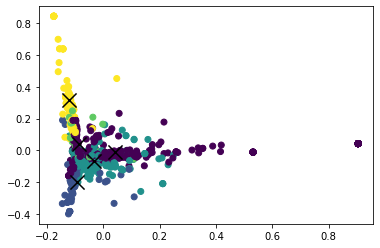

In [32]:
#Reference Link: https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering/
from sklearn.decomposition import PCA

vec = TfidfVectorizer()
vec.fit(X_train)
features = vec.transform(X_train)

# reduce the features to 2D to plot the clusters on graph
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=200, c='black')

In [33]:
#Bagging
from sklearn.ensemble import VotingClassifier

#Creating local variable for Voting classifier
ensemble=VotingClassifier(estimators)
y_pred=ensemble.fit(X_train,Y_train)

y_pred=ensemble.predict(X_test)

score=metrics.accuracy_score(Y_test,y_pred)

print("\nConfusion Matrix :\n",confusion_matrix(Y_test,y_pred))
print("\nAccuracy : ",score)
print("\nClassificatio Report :\n", metrics.classification_report(Y_test,y_pred))

scores=cross_val_score(ensemble,x,y,cv=5)
print("Cross Value Scores : ",scores)
print("Accuracy : ",scores.mean())


Confusion Matrix :
 [[275   5]
 [ 53 254]]

Accuracy :  0.9011925042589438

Classificatio Report :
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       280
           1       0.98      0.83      0.90       307

    accuracy                           0.90       587
   macro avg       0.91      0.90      0.90       587
weighted avg       0.91      0.90      0.90       587

Cross Value Scores :  [0.78571429 0.82352941 0.94117647 0.95907928 0.91815857]
Accuracy :  0.8855316039459262


In [34]:
#Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

#GradientBoostingClassifier is used because the objective of Gradient Boosting classifiers is to minimize the loss, 
#or the difference between the actual class value of the training example and the predicted class value.

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', GradientBoostingClassifier(n_estimators=100))])

text_clf.fit(X_train, Y_train)
predicted = text_clf.predict(X_test)
print("Accuracy : ",score)
print(metrics.classification_report(Y_test, predicted))
score=metrics.accuracy_score(Y_test,y_pred)


scores=cross_val_score(text_clf,x,y,cv=5)
print("Cross Value Scores : ",scores)
print("Accuracy : ",scores.mean())

Accuracy :  0.9011925042589438
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       280
           1       0.97      0.82      0.89       307

    accuracy                           0.89       587
   macro avg       0.90      0.89      0.89       587
weighted avg       0.90      0.89      0.89       587

Cross Value Scores :  [0.74489796 0.81329923 0.94629156 0.96930946 0.88235294]
Accuracy :  0.8712302312229239
